# Exploratory Data Analysis

## Summary:

### Customer Behavior:

- **Sales by Day of the Week**:  
  - **Friday** and **Saturday** have the **highest sales**, while **Monday** and **Tuesday** have the **lowest sales**.

- **Average Sales per Month**:  
  - **November** and **December** have the **highest sales**.  
  - **February** and **March** have the **lowest sales**.

- **Payment Methods**:  
  - **91%** of sales were paid by **card**.

- **Tips**:  
  - The **average tip amount** is **$211.65** and remains relatively consistent.  
  - Tips are **slightly lower in winter**, possibly due to lower sales during that season.

- **Gift Cards**:  
  - **21%** of gift cards are sold in **December**, **16%** in **November**, and **14%** in **June**.  
  - **January** has the **lowest sales** at **3%**, followed by **April** and **May** at **5%** each.

---

### Sales and Weather:

- **Average Net Sales**:  
  - The average net sales amount is **$3,125.42**.

- **Temperature**:  
  - **Warmer temperatures** lead to **higher sales**.

- **Rainfall and Precipitation**:  
  - Sales are **lower** during periods of **heavy rainfall and precipitation**.

- **Snowfall**:  
  - When it snows, sales tend to be **higher with more snowfall**.

- **Seasonal Trends**:  
  - Sales are **highest in the Fall** and **lowest in the Winter**.

---

### Sales and Holidays:

- **Holiday Sales Trends**:  
  - Sales are **significantly higher on regular days** compared to holidays.

- **Before and After Holidays**:  
  - Out of the two days before and after a holiday:  
    - Sales are **lowest the day before a holiday**.  
    - Sales are **highest two days after a holiday**.

- **Top and Bottom Holidays**:  
  - **Good Friday** has the **highest average sales** at **$5,188.59**.  
  - **Family Day** ($1,969.62) and **Victoria Day** ($1,951.18) have the **lowest average sales**.


## Recommendations:

### Customer Behavior:

#### Day of the Week Promotions:
- Boost **weekday sales** (Monday and Tuesday) by offering **discounts or loyalty programs** to encourage foot traffic.

#### Holiday Promotions:
- Focus marketing efforts on **November and December**, leveraging holiday demand.
- Introduce **post-holiday sales** in **January** to counteract the seasonal dip in sales.

#### Gift Card Sales:
- Run **targeted gift card campaigns** during **November and December**.
- Offer **gift card discounts or bonus incentives** during slower months like **January**, **April**, and **May**.

---

### Sales and Weather:

#### Rainy Day Strategy:
- Encourage **online shopping or delivery services** during rainy periods to mitigate the impact on in-store sales.

#### Leverage Snowfall Trends:
- Promote sales during snowfall by offering **special discounts or bundled deals**, as customers may stock up during these periods.

#### Temperature-Based Offers:
- Offer **seasonal menus or products** tailored to **warmer months** to capitalize on the increase in sales during this period.

---

### Sales and Holidays:

#### Timing Around Holidays:
- Implement **pre-holiday promotions** to boost sales on the day before holidays.
- Introduce **post-holiday deals** to maximize sales two days after holidays.

#### Focus on Low-Performing Holidays:
- For **Family Day** and **Victoria Day**, offer **holiday-specific promotions or events** to increase customer engagement and sales.

#### Highlight Successful Holidays:
- Analyze what makes **Good Friday** successful and replicate similar strategies for other holidays.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
from numpy import mean



In [33]:
# Load the config.yaml file
with open("../config.yaml", "r") as file:
    config = yaml.safe_load(file)

In [34]:
# Get the path to the clean data
clean_data_path = config['output_data']['cleaned_merged_climate_sales']

# Load the clean data
df = pd.read_csv(clean_data_path)

# Inspect the data
print(df.head())

         date        day  gross_sales  returns  discounts_comps  net_sales  \
0  2023-02-01  Wednesday       919.07      0.0           -33.35     885.72   
1  2023-02-02   Thursday      1463.52      0.0           -20.61    1442.91   
2  2023-02-03     Friday      1051.04      0.0            -9.60    1041.44   
3  2023-02-04   Saturday      2243.72      0.0           -12.43    2231.29   
4  2023-02-05     Sunday      1405.99      0.0           -25.12    1380.87   

   gift_card_sales     tax     tip  refunds_by_amount  ...  total_precip_mm  \
0              0.0   84.44   42.35                0.0  ...              0.0   
1              0.0  108.76   72.70                0.0  ...              0.0   
2              0.0   93.65   49.94                0.0  ...              0.3   
3              0.0  176.67  186.98                0.0  ...              0.0   
4              0.0   85.04   77.20                0.0  ...              0.0   

   total_snow_mm  holiday_name  is_holiday  is_holiday_p

In [35]:
df.columns

Index(['date', 'day', 'gross_sales', 'returns', 'discounts_comps', 'net_sales',
       'gift_card_sales', 'tax', 'tip', 'refunds_by_amount', 'cash', 'card',
       'gift_card', 'fees', 'is_store_open', 'mean_temp_c', 'total_rain_mm',
       'total_precip_mm', 'total_snow_mm', 'holiday_name', 'is_holiday',
       'is_holiday_prev_1', 'is_holiday_next_1', 'is_holiday_prev_2',
       'is_holiday_next_2', 'temp_category', 'season'],
      dtype='object')

In [36]:
# Calculate summary statistics for net_sales
net_sales_summary = df['net_sales'].describe()

# Display the summary statistics
net_sales_summary

count     669.000000
mean     3125.424036
std      1453.171015
min         0.000000
25%      2574.120000
50%      3230.890000
75%      4023.350000
max      7963.800000
Name: net_sales, dtype: float64

In [37]:
df['net_sales'].median()

np.float64(3230.89)

<Axes: ylabel='net_sales'>

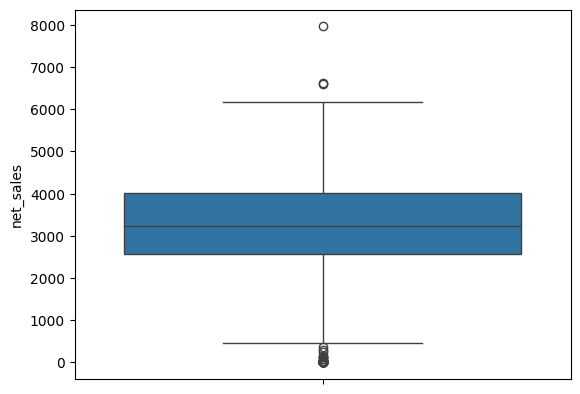

In [38]:
sns.boxplot(y='net_sales', data=df)

In [39]:
# Calculate summary statistics for tip
tips_summary = df['tip'].describe()

# Display the summary statistics
tips_summary

count    669.000000
mean     211.658655
std      102.863341
min        0.000000
25%      173.980000
50%      215.450000
75%      272.630000
max      484.920000
Name: tip, dtype: float64

In [40]:
temp_summary = df['mean_temp_c'].describe()
temp_summary

count    669.000000
mean      10.586024
std        8.703492
min      -12.900000
25%        3.100000
50%       11.600000
75%       18.200000
max       26.500000
Name: mean_temp_c, dtype: float64

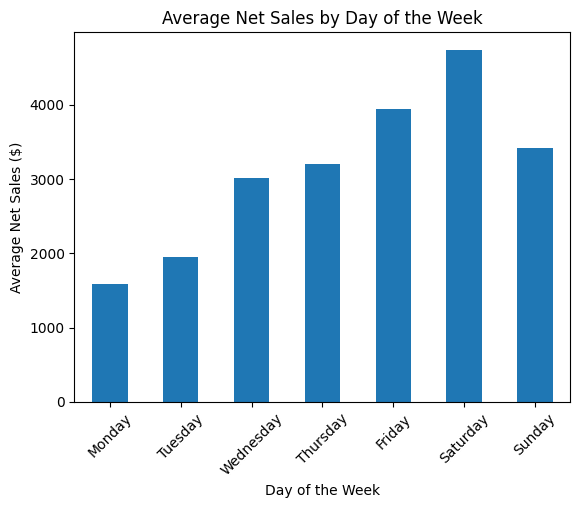

In [41]:
# Sales by day of the week
sales_by_day = df.groupby('day')['net_sales'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot average sales by day of the week
plt.figure()
sales_by_day.plot(kind='bar')
plt.title('Average Net Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Net Sales ($)')
plt.xticks(rotation=45)
plt.savefig("../figures/sales_day_of_the_week.jpeg", format="jpeg", dpi=300)
plt.show()

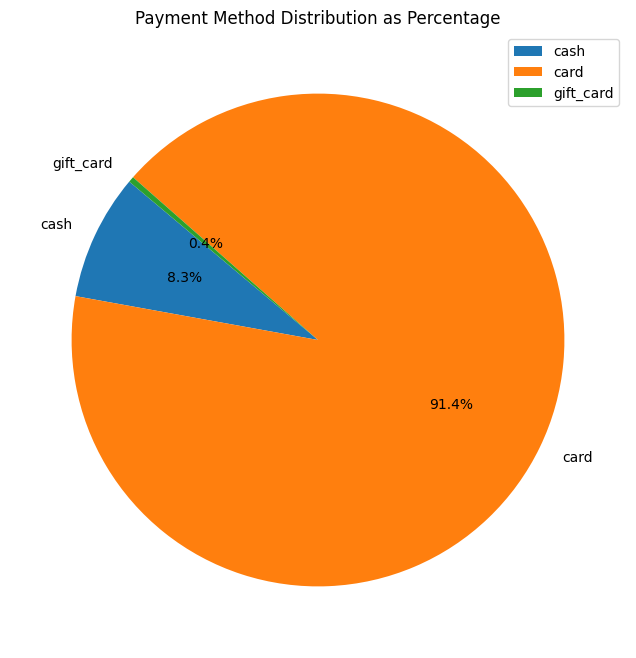

In [42]:
# Payment Methods
payment_methods = ['cash', 'card', 'gift_card']

# Calculate the sum for each payment method
payment_totals = df[payment_methods].sum()

# Calculate percentages
payment_percentages = (payment_totals / payment_totals.sum()) * 100

# Plot as a pie chart
plt.figure(figsize=(8, 8))
payment_percentages.plot(kind='pie', autopct='%1.1f%%', startangle=140, legend=True)
plt.title('Payment Method Distribution as Percentage')
plt.ylabel('')  # Remove the y-label for cleaner presentation
plt.savefig("../figures/payment_methods.jpeg", format="jpeg", dpi=300)
plt.show()



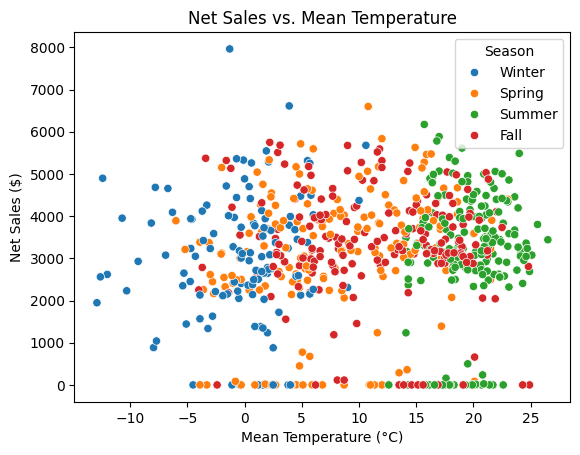

In [43]:
# Plot net sales vs mean temperature
plt.figure()
sns.scatterplot(x='mean_temp_c', y='net_sales', data=df, hue='season')
plt.title('Net Sales vs. Mean Temperature')
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Net Sales ($)')
plt.legend(title='Season')
plt.savefig("../figures/net_sales_mean_temp.jpeg", format="jpeg", dpi=300)
plt.show()

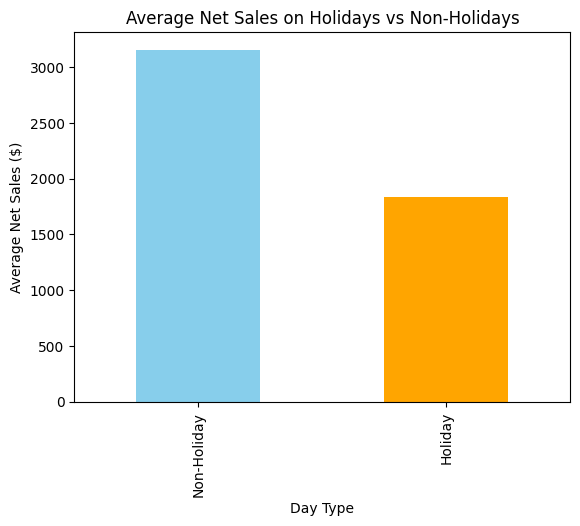

In [44]:
# Sales on holidays vs non-holidays
holiday_sales = df.groupby('is_holiday')['net_sales'].mean()
holiday_sales.index = ['Non-Holiday', 'Holiday']

# Plot holiday vs non-holiday sales
plt.figure()
holiday_sales.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Average Net Sales on Holidays vs Non-Holidays')
plt.xlabel('Day Type')
plt.ylabel('Average Net Sales ($)')
plt.show()

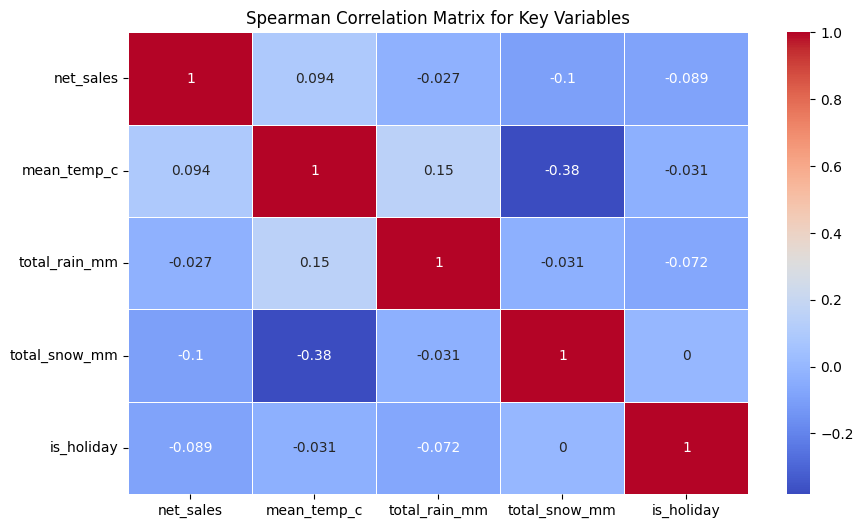

In [45]:
# Calculate Spearman's correlation matrix
spearman_corr = df[['net_sales', 'mean_temp_c', 'total_rain_mm', 'total_snow_mm', 'is_holiday']].corr(method='spearman')

# Plot the Spearman correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Spearman Correlation Matrix for Key Variables')
plt.savefig("../figures/spearman_correlation_matrix.jpeg", format="jpeg", dpi=300)
plt.show()


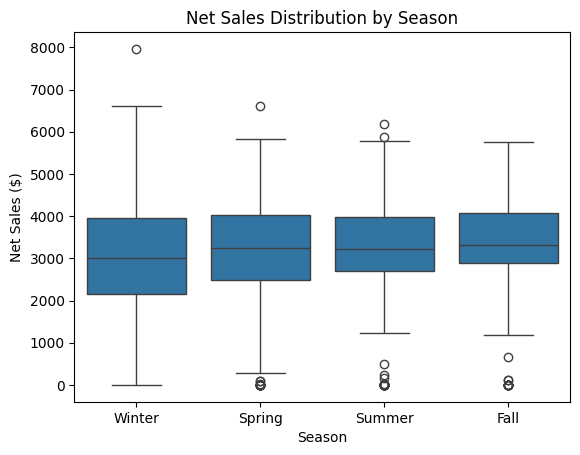

In [46]:
# Net Sales Distribution by Season
plt.figure()
sns.boxplot(x='season', y='net_sales', data=df)
plt.title('Net Sales Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Net Sales ($)')
plt.savefig("../figures/net_sales_distribution_by_season.jpeg", format="jpeg", dpi=300)
plt.show()

/var/folders/hh/hx7f_d913pbf5gbc452qrps00000gp/T/ipykernel_7965/256772920.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='net_sales', data=df, estimator=mean, ci=None)


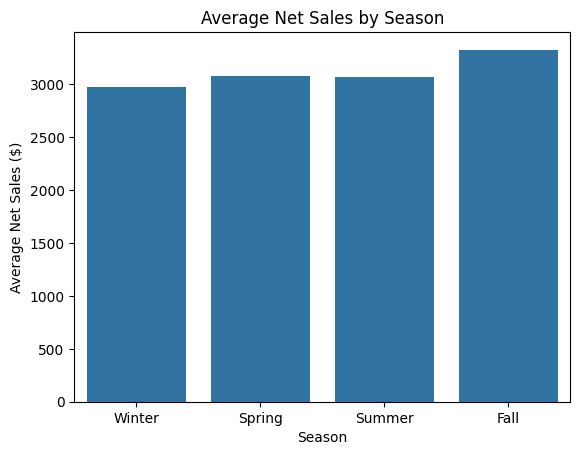

In [47]:

sns.barplot(x='season', y='net_sales', data=df, estimator=mean, ci=None)
plt.title('Average Net Sales by Season')
plt.xlabel('Season')
plt.ylabel('Average Net Sales ($)')
plt.savefig("../figures/avg_net_sales_by_season.jpeg", format="jpeg", dpi=300)
plt.show()


/var/folders/hh/hx7f_d913pbf5gbc452qrps00000gp/T/ipykernel_7965/113980700.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='temp_category', y='net_sales', data=df, estimator=mean, ci=None)


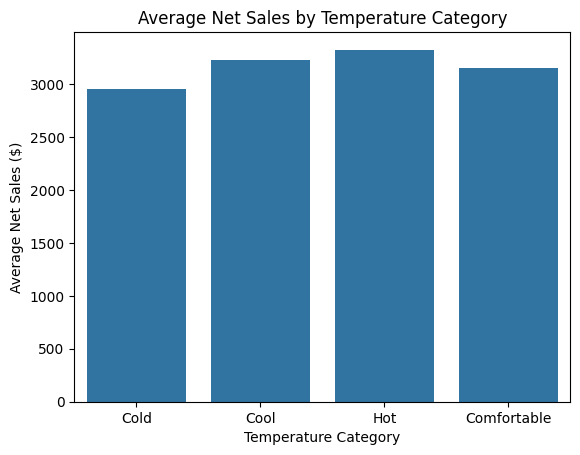

In [48]:
# Net Sales by Temperature Category
plt.figure()
sns.barplot(x='temp_category', y='net_sales', data=df, estimator=mean, ci=None)
plt.title('Average Net Sales by Temperature Category')
plt.xlabel('Temperature Category')
plt.ylabel('Average Net Sales ($)')
plt.savefig("../figures/avg_net_sales_by_temp_category.jpeg", format="jpeg", dpi=300)
plt.show()

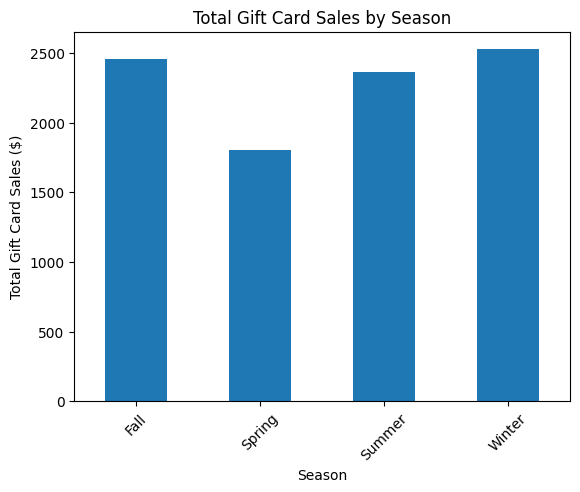

In [49]:
# Grouping gift card sales by season and calculating the total
gift_card_sales_by_season = df.groupby('season')['gift_card'].sum()

# Plotting gift card sales by season
gift_card_sales_by_season.plot(kind='bar')
plt.title('Total Gift Card Sales by Season')
plt.xlabel('Season')
plt.ylabel('Total Gift Card Sales ($)')
plt.xticks(rotation=45)
plt.savefig("../figures/gift_card_sales_by_season.jpeg", format="jpeg", dpi=300)
plt.show()

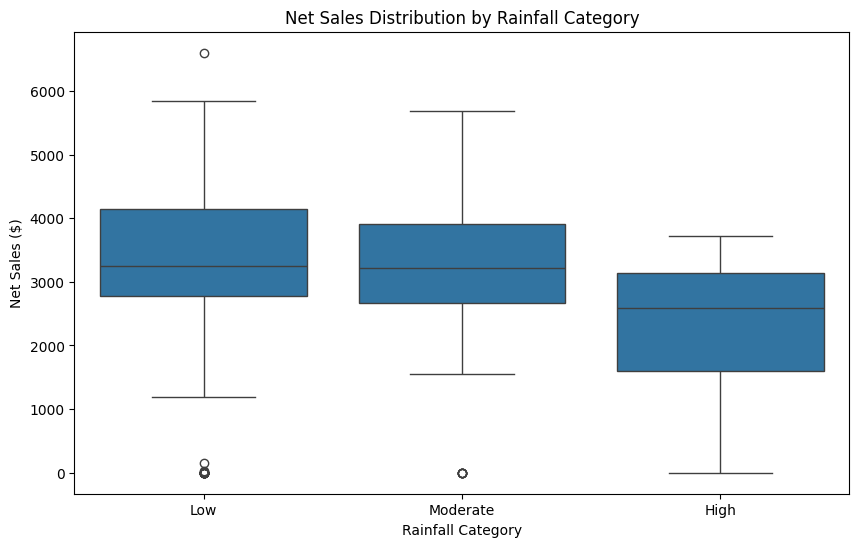

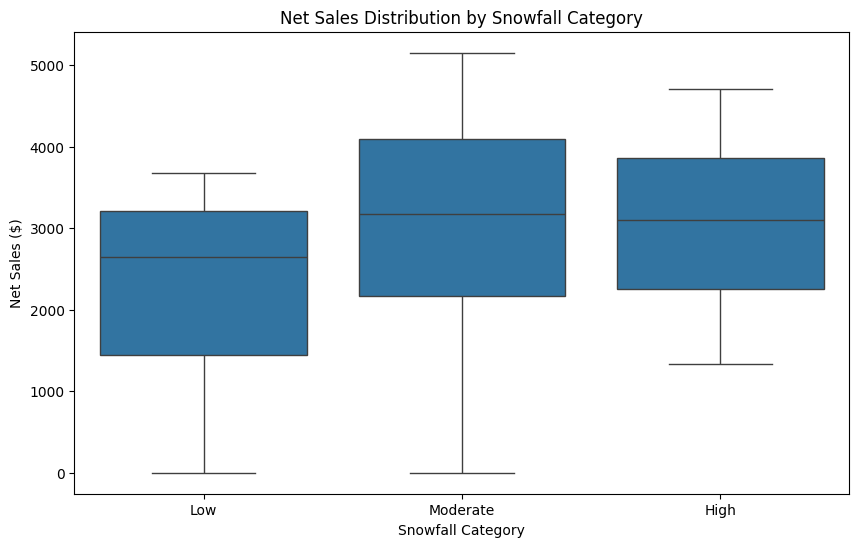

In [50]:
# Boxplots: Net Sales Distribution by Rainfall Categories

# Create a rainfall category
df['rainfall_category'] = pd.cut(df['total_rain_mm'], bins=[0, 5, 20, 100], labels=['Low', 'Moderate', 'High'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='rainfall_category', y='net_sales', data=df)
plt.title('Net Sales Distribution by Rainfall Category')
plt.xlabel('Rainfall Category')
plt.ylabel('Net Sales ($)')
plt.show()

# Boxplots: Net Sales Distribution by Snowfall Categories

# Create a snowfall category
df['snowfall_category'] = pd.cut(df['total_snow_mm'], bins=[0, 2, 10, 50], labels=['Low', 'Moderate', 'High'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='snowfall_category', y='net_sales', data=df)
plt.title('Net Sales Distribution by Snowfall Category')
plt.xlabel('Snowfall Category')
plt.ylabel('Net Sales ($)')
plt.show()

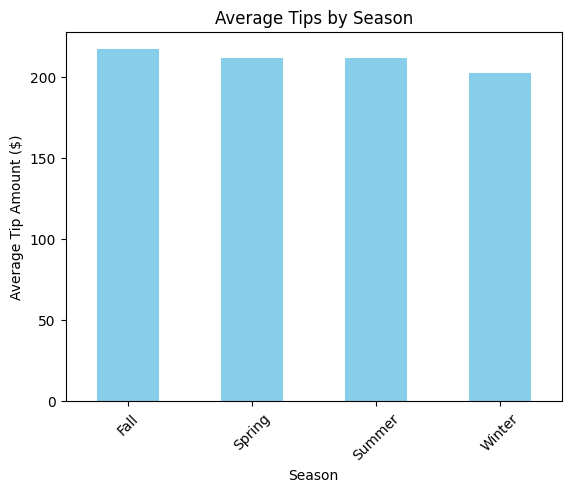

In [51]:
# Group by season and calculate the average tips
avg_tips_by_season = df.groupby('season')['tip'].mean()

# Plot the average tips by season
avg_tips_by_season.plot(kind='bar', color='skyblue')
plt.title('Average Tips by Season')
plt.xlabel('Season')
plt.ylabel('Average Tip Amount ($)')
plt.xticks(rotation=45)
plt.show()

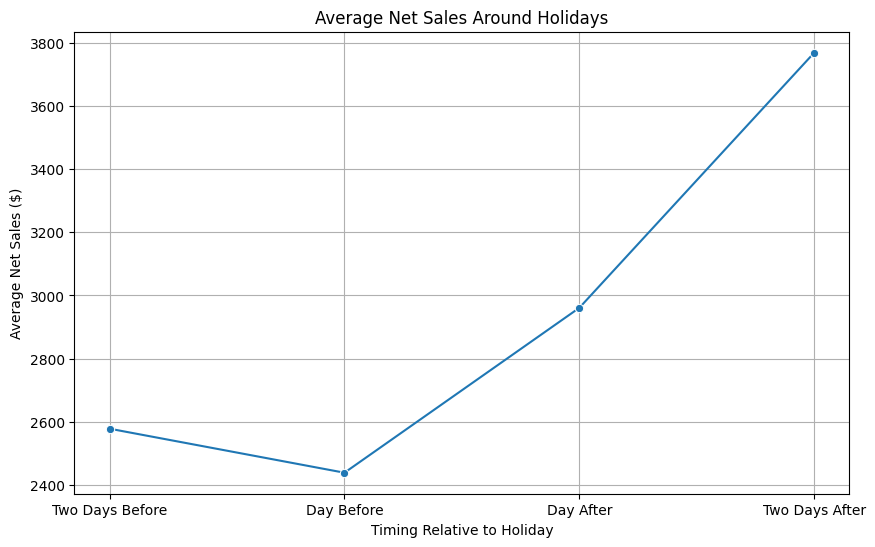

In [52]:
# Calculate average net sales for each holiday-related variable
avg_sales_by_holiday_timing = df.groupby(['is_holiday_prev_1', 'is_holiday_prev_2', 'is_holiday_next_1', 'is_holiday_next_2'])['net_sales'].mean()

# Create a new DataFrame for visualization
holiday_timing_sales = pd.DataFrame({
    'Day': ['Two Days Before', 'Day Before', 'Day After', 'Two Days After'],
    'Average Net Sales': [
        df[df['is_holiday_prev_2'] == 1]['net_sales'].mean(),
        df[df['is_holiday_prev_1'] == 1]['net_sales'].mean(),
        df[df['is_holiday_next_1'] == 1]['net_sales'].mean(),
        df[df['is_holiday_next_2'] == 1]['net_sales'].mean()
    ]
})

# Plot the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Day', y='Average Net Sales', data=holiday_timing_sales, marker='o', linestyle='-')
plt.title('Average Net Sales Around Holidays')
plt.xlabel('Timing Relative to Holiday')
plt.ylabel('Average Net Sales ($)')
plt.grid(True)
plt.savefig("../figures/avg_net_sale_around_holidays.jpeg", format="jpeg", dpi=300)
plt.show()

/var/folders/hh/hx7f_d913pbf5gbc452qrps00000gp/T/ipykernel_7965/1005535671.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_by_month.index, y=avg_sales_by_month.values, palette='viridis')


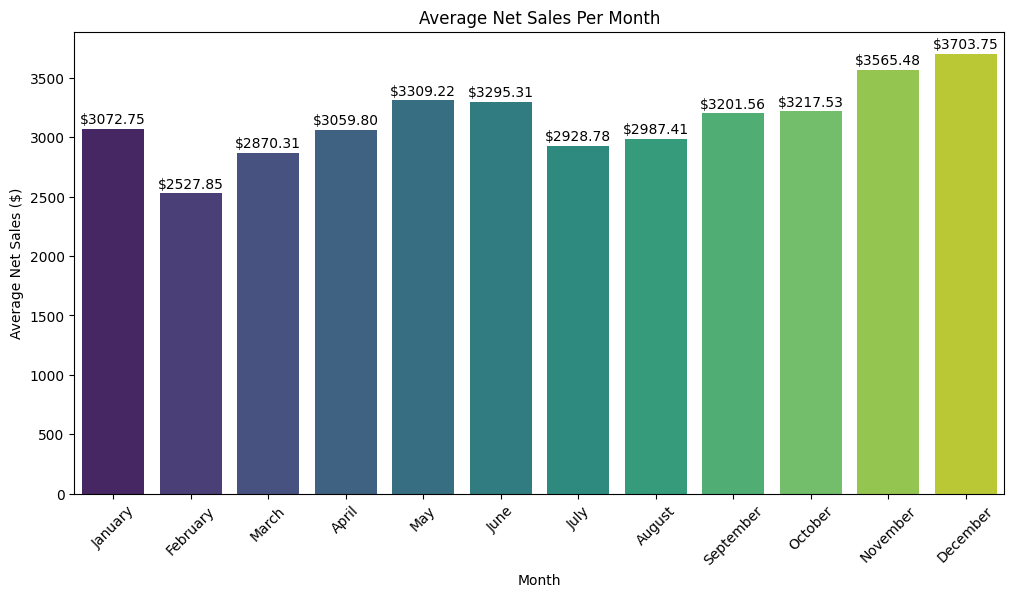

In [53]:
# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract the month from the 'date' column
df['month'] = df['date'].dt.month_name()

# Calculate the average net sales per month
avg_sales_by_month = df.groupby('month')['net_sales'].mean()

# Reorder the months for correct chronological order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]
avg_sales_by_month = avg_sales_by_month.reindex(month_order)

# Plot the average net sales per month
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_sales_by_month.index, y=avg_sales_by_month.values, palette='viridis')

# Add annotations on each bar
for i, value in enumerate(avg_sales_by_month.values):
    plt.text(i, value + 20, f'${value:.2f}', ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title('Average Net Sales Per Month')
plt.xlabel('Month')
plt.ylabel('Average Net Sales ($)')
plt.xticks(rotation=45)
plt.savefig("../figures/avg_net_sales_per_month.jpeg", format="jpeg", dpi=300)
# Display the plot
plt.show()


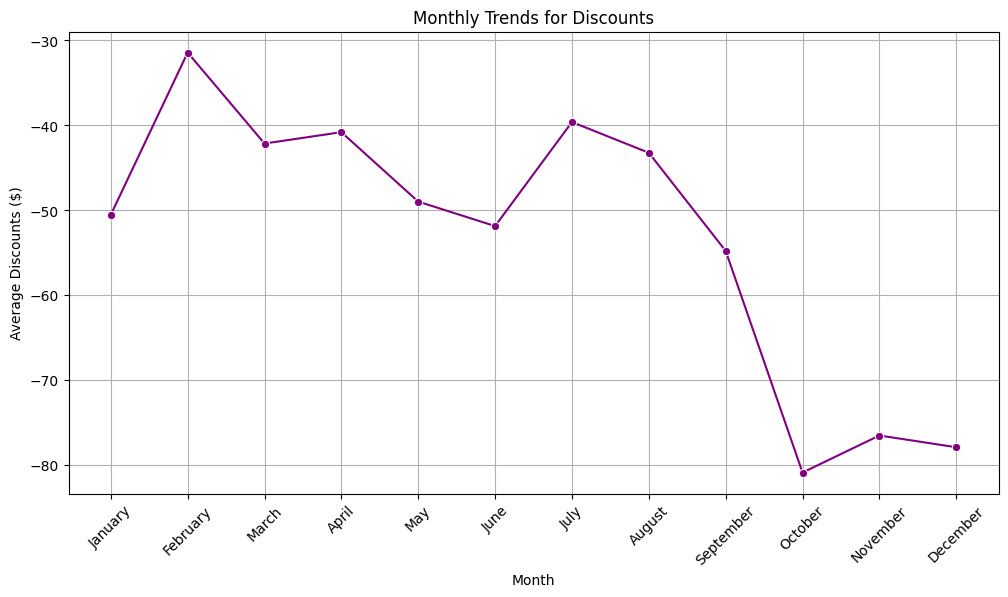

In [54]:
# Calculate the average discounts per month
avg_discounts_by_month = df.groupby('month')['discounts_comps'].mean()

# Reorder the months for correct chronological order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]
avg_discounts_by_month = avg_discounts_by_month.reindex(month_order)

# Plot the average discounts per month using a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_discounts_by_month.index, y=avg_discounts_by_month.values, marker='o', linestyle='-', color='purple')

# Add titles and labels
plt.title('Monthly Trends for Discounts')
plt.xlabel('Month')
plt.ylabel('Average Discounts ($)')
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.show()

In [55]:
# Display the unique values in the 'mean_temp_c' column to inspect the range of temperatures
unique_temps = df['mean_temp_c'].unique()

# Calculate and display the average temperature for each month to check for anomalies
avg_temp_by_month = df.groupby('month')['mean_temp_c'].mean().reindex(month_order)

unique_temps, avg_temp_by_month

(array([-7.95000000e+00, -5.10000000e+00, -7.70000000e+00, -1.03000000e+01,
         1.40000000e+00, -4.00000000e-01,  1.80000000e+00,  2.00000000e+00,
         2.50000000e+00,  9.00000000e-01, -3.00000000e-01,  1.60000000e+00,
         2.30000000e+00,  9.00000000e+00, -4.30000000e+00, -3.30000000e+00,
         4.90000000e+00,  1.20000000e+00, -2.80000000e+00, -3.20000000e+00,
        -4.75000000e+00, -6.30000000e+00, -5.40000000e+00, -4.50000000e+00,
        -1.10000000e+00,  4.00000000e-01, -2.00000000e+00,  1.50000000e+00,
         2.00000000e-01, -8.00000000e-01, -1.00000000e+00, -1.80000000e+00,
        -1.70000000e+00, -3.90000000e+00, -2.70000000e+00, -7.00000000e-01,
         3.00000000e+00, -3.10000000e+00, -3.60000000e+00,  2.75000000e+00,
         4.60000000e+00,  4.10000000e+00,  5.80000000e+00,  5.30000000e+00,
         2.70000000e+00,  1.30000000e+00,  4.20000000e+00,  5.50000000e+00,
         6.80000000e+00,  8.70000000e+00,  1.10000000e+00,  5.05000000e+00,
         1.2

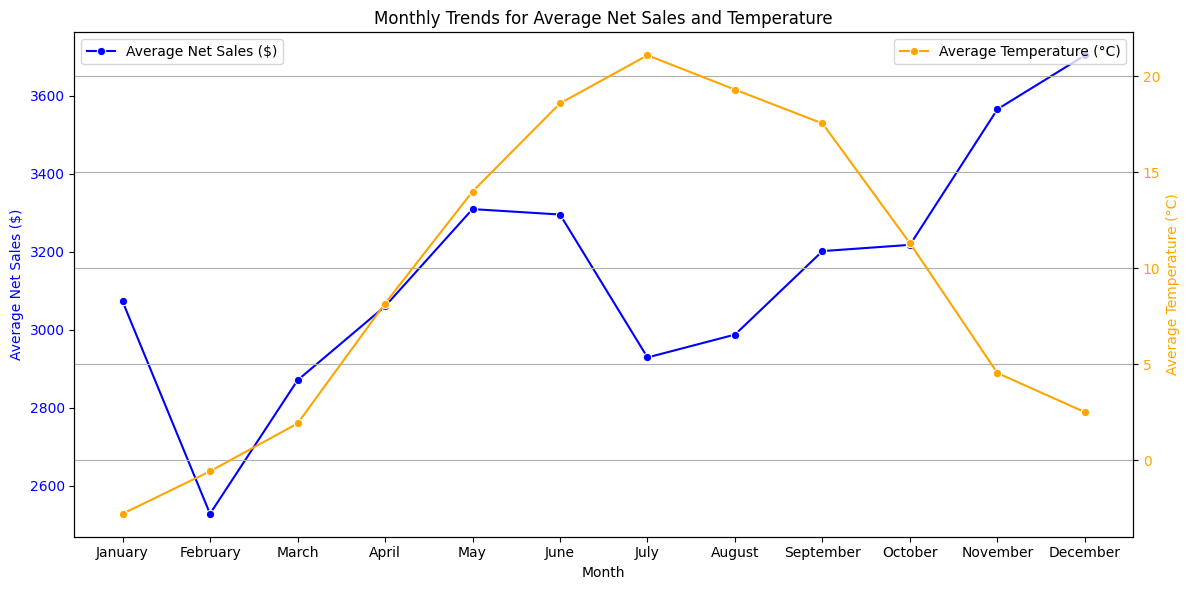

In [56]:
# Extract the month names from the 'date' column
df['month'] = df['date'].dt.month_name()

# Calculate the average net sales and mean temperature for each month
avg_sales_temp_by_month = df.groupby('month')[['net_sales', 'mean_temp_c']].mean()

# Reorder the months for correct chronological order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]
avg_sales_temp_by_month = avg_sales_temp_by_month.reindex(month_order)

# Plot average net sales and mean temperature using a dual y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Net Sales on the primary y-axis
sns.lineplot(x=avg_sales_temp_by_month.index, y=avg_sales_temp_by_month['net_sales'], marker='o', color='blue', ax=ax1, label='Average Net Sales ($)')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Net Sales ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for Mean Temperature
ax2 = ax1.twinx()
sns.lineplot(x=avg_sales_temp_by_month.index, y=avg_sales_temp_by_month['mean_temp_c'], marker='o', color='orange', ax=ax2, label='Average Temperature (°C)')
ax2.set_ylabel('Average Temperature (°C)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and grid
plt.title('Monthly Trends for Average Net Sales and Temperature')
fig.tight_layout()
plt.grid(True)

# Show the plot
plt.show()

/var/folders/hh/hx7f_d913pbf5gbc452qrps00000gp/T/ipykernel_7965/788800735.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_by_holiday.index, y=avg_sales_by_holiday.values, palette='viridis')


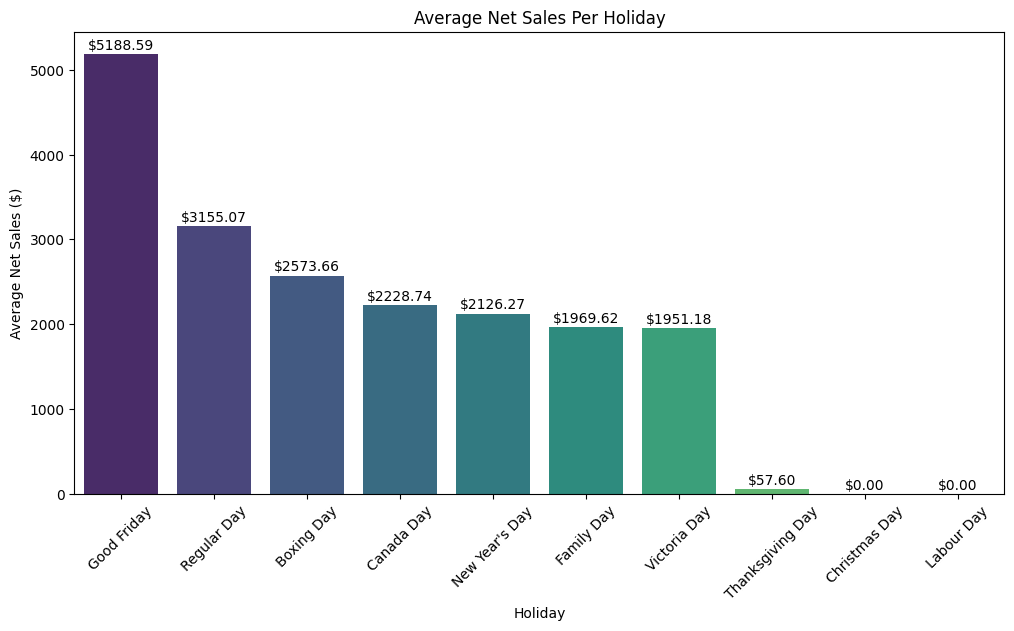

In [57]:
# Group the data by holiday name and calculate the average net sales
avg_sales_by_holiday = df.groupby('holiday_name')['net_sales'].mean().sort_values(ascending=False)

# Plot the average net sales per holiday
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_sales_by_holiday.index, y=avg_sales_by_holiday.values, palette='viridis')

# Add annotations on each bar
for i, value in enumerate(avg_sales_by_holiday.values):
    plt.text(i, value + 20, f'${value:.2f}', ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title('Average Net Sales Per Holiday')
plt.xlabel('Holiday')
plt.ylabel('Average Net Sales ($)')
plt.xticks(rotation=45)
plt.savefig("../figures/top_performing_holidays.jpeg", format="jpeg", dpi=300)
# Display the plot
plt.show()


/var/folders/hh/hx7f_d913pbf5gbc452qrps00000gp/T/ipykernel_7965/3884328773.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gift_card_sales_percentage.index, y=gift_card_sales_percentage.values, palette='viridis')


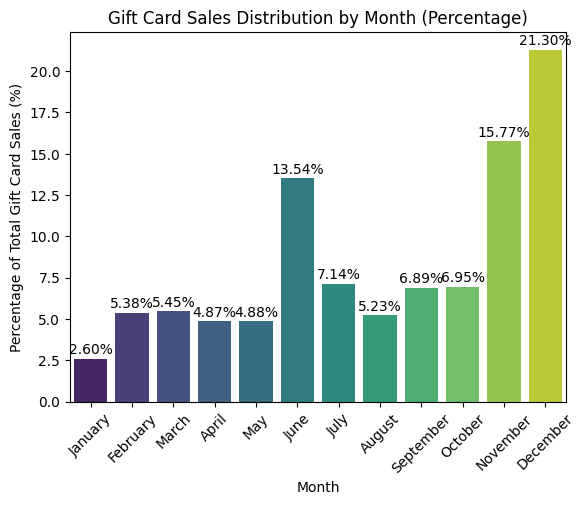

In [58]:
# Calculate the total gift card sales for each month
total_gift_card_sales_by_month = df.groupby('month')['gift_card_sales'].sum()

# Reorder the months for correct chronological order
total_gift_card_sales_by_month = total_gift_card_sales_by_month.reindex(month_order)

# Calculate the percentage of gift card sales for each month
gift_card_sales_percentage = (total_gift_card_sales_by_month / total_gift_card_sales_by_month.sum()) * 100

# Plot the gift card sales by percentage
sns.barplot(x=gift_card_sales_percentage.index, y=gift_card_sales_percentage.values, palette='viridis')

# Add annotations on each bar
for i, value in enumerate(gift_card_sales_percentage.values):
    plt.text(i, value + 0.1, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title('Gift Card Sales Distribution by Month (Percentage)')
plt.xlabel('Month')
plt.ylabel('Percentage of Total Gift Card Sales (%)')
plt.xticks(rotation=45)
plt.savefig("../figures/gift_card_sales_distribution_by_month.jpeg", format="jpeg", dpi=300)
# Display the plot
plt.show()


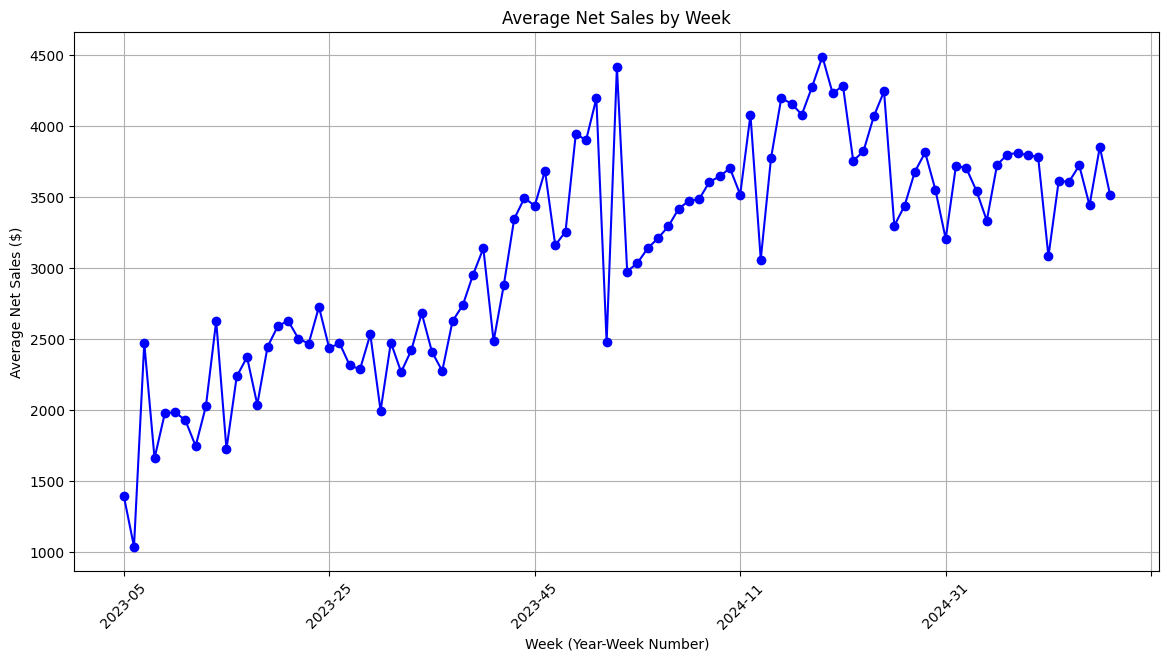

In [59]:
# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract the week number and year from the 'date' column
df['week'] = df['date'].dt.strftime('%Y-%U')

# Calculate the average net sales for each week
avg_sales_by_week = df.groupby('week')['net_sales'].mean()

# Plot the average net sales by week using a line graph
plt.figure(figsize=(14, 7))
avg_sales_by_week.plot(kind='line', marker='o', linestyle='-', color='blue')

# Add titles and labels
plt.title('Average Net Sales by Week')
plt.xlabel('Week (Year-Week Number)')
plt.ylabel('Average Net Sales ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig("../figures/avg_net_sales_by_week.jpeg", format="jpeg", dpi=300)
# Display the plot
plt.show()


In [60]:
tip_percentage = (df['tip'].sum() / df['net_sales'].sum()) * 100
tip_percentage

np.float64(6.772158026528446)